# Worksheet 02

Name: Muntasir Meah
UID: U57620875

### Topics

- Effective Programming

### Effective Programming

a) What is a drawback of the top down approach?

Psuedo code to provide a blueprint of which functions to implement. Therefore you don't have runnable until the end of the implementation of all functions.

b) What is a drawback of the bottom up approach?

Requires a greater level of planning in terms of implementing functions,functions are created first, which may be difficult since no single plan is perfect and some functions can be unneccasary.

c) What are 3 things you can do to have a better debugging experience



1.   Don't panic! - Take your time when debugging code, if the error cannot be solved or a concept is clicking, take a step back and reattempt to solve it the next day.
2.   Read the error message - understand the error, and take the appropriate action from there with a sense of direction.
3. Re-read code, attempt to mentally trace error, if this doesn't work, try refactoring or simplifying code.



d) (Optional) Follow along with the live coding. You can write your code here:

## Exercise

This exercise will use the [Titanic dataset](https://www.kaggle.com/c/titanic/data) (https://www.kaggle.com/c/titanic/data). Download the file named `train.csv` and place it in the same folder as this notebook.

The goal of this exercise is to practice using [pandas](https://pypi.org/project/pandas/) methods. If your:

1. code is taking a long time to run
2. code involves for loops or while loops
3. code spans multiple lines

look through the pandas documentation for alternatives. This [cheat sheet](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf) may come in handy.

a) Complete the code below to read in a filepath to the `train.csv` and returns the DataFrame.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv("/content/drive/MyDrive/train.csv")
# df.describe()

b) Complete the code so it returns the number of rows that have at least one empty column value

In [3]:
print("there are " +  str(df.isnull().sum().sum()) + " rows with at least one empty value")

there are 866 rows with at least one empty value


c) Complete the code below to remove all columns with more than 200 NaN values

In [4]:
df = df.dropna(axis=1, thresh=len(df) - 200)
df.columns

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


d) Complete the code below to replaces `male` with 0 and `female` with 1

In [5]:
# df['Sex'] = ...
df["Sex"] = np.where(df["Sex"] == "female", 0, 1)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,S


e) Complete the code below to add four columns `First Name`, `Middle Name`, `Last Name`, and `Title` corresponding to the value in the `name` column.

For example: `Braund, Mr. Owen Harris` would be:

|First Name | Middle Name | Last Name | Title |
|-----------|-------------|-----------|-------|
| Owen      |  Harris     |  Braund   | Mr    |

Anything not clearly one of the above 4 categories can be ignored.

In [6]:
# split on ', ' (comma separated by a space - for title) OR '\.\s+' (period then space - for first name) OR ' ' (space - for middle name)
df[['Last Name', 'Title', 'First Name', 'Middle Name']] = df['Name'].str.split(r', |\.\s+| ', expand=True)[[0, 1, 2, 3]]

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Last Name,Title,First Name,Middle Name
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,S,Braund,Mr,Owen,Harris
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C,Cumings,Mrs,John,Bradley
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,S,Heikkinen,Miss,Laina,None
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,S,Futrelle,Mrs,Jacques,Heath
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,S,Allen,Mr,William,Henry


f) Complete the code below to replace all missing ages with the average age

In [7]:
df['Age'].fillna(round(df['Age'].mean(), 1), inplace=True)
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Last Name,Title,First Name,Middle Name
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,S,Braund,Mr,Owen,Harris
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C,Cumings,Mrs,John,Bradley
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,S,Heikkinen,Miss,Laina,None
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,S,Futrelle,Mrs,Jacques,Heath
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,S,Allen,Mr,William,Henry
5,6,0,3,"Moran, Mr. James",1,29.7,0,0,330877,8.4583,Q,Moran,Mr,James,None
6,7,0,1,"McCarthy, Mr. Timothy J",1,54.0,0,0,17463,51.8625,S,McCarthy,Mr,Timothy,J
7,8,0,3,"Palsson, Master. Gosta Leonard",1,2.0,3,1,349909,21.0750,S,Palsson,Master,Gosta,Leonard
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.0,0,2,347742,11.1333,S,Johnson,Mrs,Oscar,W
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.0,1,0,237736,30.0708,C,Nasser,Mrs,Nicholas,(Adele


g) Plot a bar chart of the average age of those that survived and did not survive. Briefly comment on what you observe.

Text(0, 0.5, 'Mean Age')

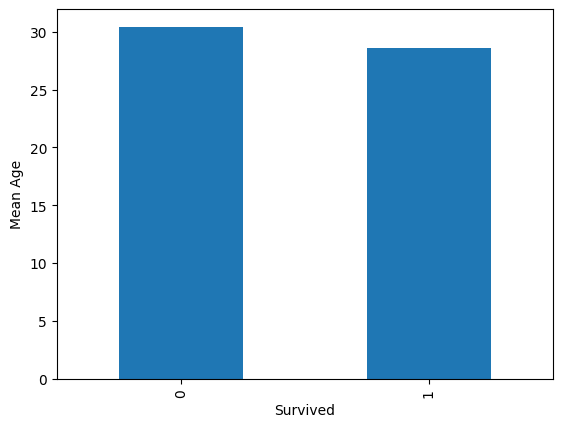

In [8]:
data = df[["Survived", "Age"]].groupby("Survived").mean()

ax = data.plot(kind='bar', legend=False)
ax.set_ylabel('Mean Age')

I noticed there does not seem to be a correlation between age and rate of survival. The average of survivors and non-survivors is both around 30.